# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset? There are no missing values.
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [5]:
#Loading the Data into a dataframe.
df = pd.read_csv('diabetes.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning

In [7]:
#Replacing zero's with the mean.

# Calculate the mean
mean_A = df[df['Glucose'] != 0]['Glucose'].mean()
mean_B = df[df['BloodPressure'] != 0]['BloodPressure'].mean()
mean_C = df[df['SkinThickness'] != 0]['SkinThickness'].mean()
mean_D = df[df['Insulin'] != 0]['Insulin'].mean()
mean_E = df[df['BMI'] != 0]['BMI'].mean()
mean_F = df[df['DiabetesPedigreeFunction'] != 0]['DiabetesPedigreeFunction'].mean()
mean_G = df[df['Age'] != 0]['Age'].mean()

# Replace zeros with the mean
df['Glucose'] = df['Glucose'].replace(0, mean_A)
df['BloodPressure'] = df['BloodPressure'].replace(0, mean_B)
df['SkinThickness'] = df['SkinThickness'].replace(0, mean_C)

df['Insulin'] = df['Insulin'].replace(0, mean_D)
df['BMI'] = df['BMI'].replace(0, mean_E)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, mean_F)
df['Age'] = df['Age'].replace(0, mean_G)


<Axes: >

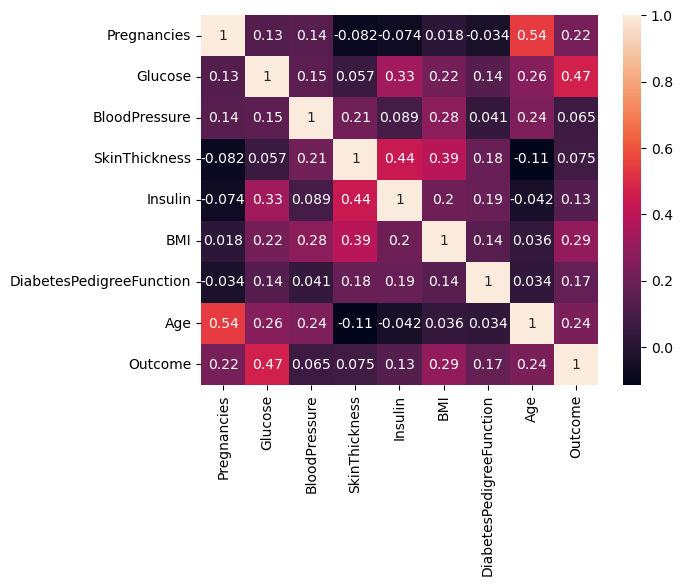

In [4]:
#What is the correlation between the predictor variables?
correlations = df.corr()
sns.heatmap(correlations, annot=True)

<Axes: >

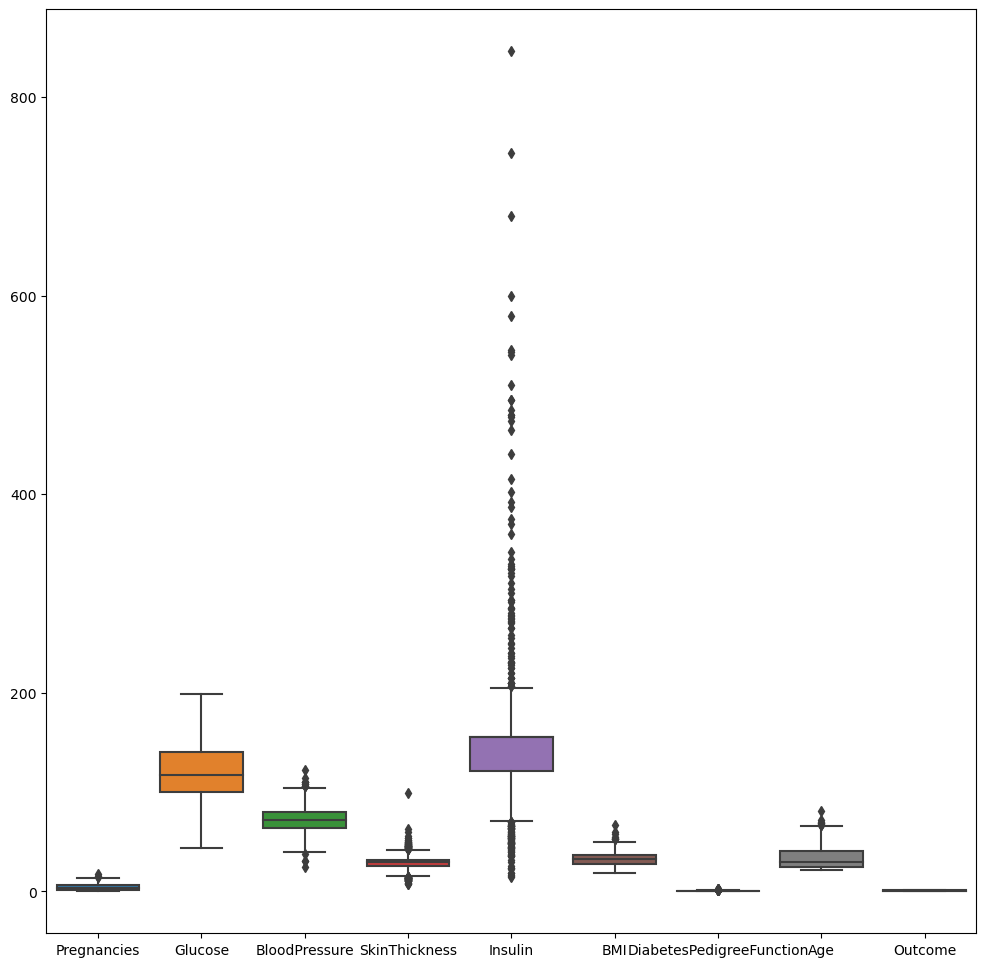

In [8]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df)

<Axes: >

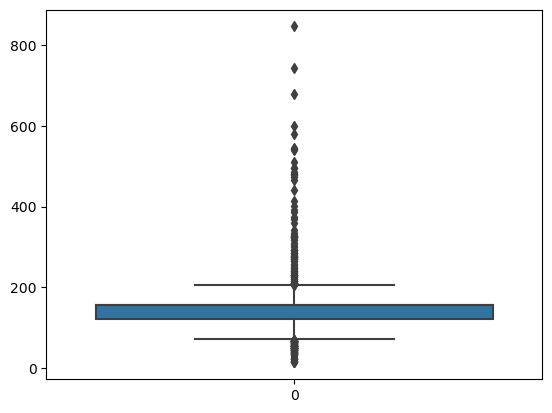

In [9]:
sns.boxplot(data=df['Insulin'])

In [10]:
#What is the average age in the dataset?
avg_age = df['Age'].mean()

In [11]:
print('Average age of patient in dataset: ' + str(avg_age))

Average age of patient in dataset: 33.240885416666664


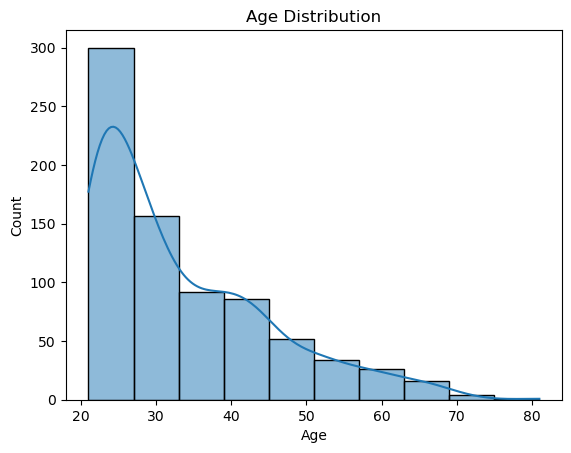

In [12]:
#Visualization of average age distribution in data.
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Age Distribution')
plt.show()


In [13]:
#Average glucose level with diabetes
has_Diabetes = df[df['Outcome'] == 1]
avg_gluc = has_Diabetes['Glucose'].mean()
print("Average Glucose with Diabetes: " + str(avg_gluc))

Average Glucose with Diabetes: 142.16557285655603


In [14]:
#Average glucose level without diabetes.
not_Diabetes = df[df['Outcome'] == 0]
avg_gluc_not = not_Diabetes['Glucose'].mean()
print("Average Glucose without Diabetes: " + str(avg_gluc_not))

Average Glucose without Diabetes: 110.71012057667103


In [15]:
#Average BMI with diabetes
avg_bmi_diabetes = has_Diabetes['BMI'].mean()
print("Average BMI with Diabetes: " + str(avg_bmi_diabetes))

Average BMI with Diabetes: 35.38475719158501


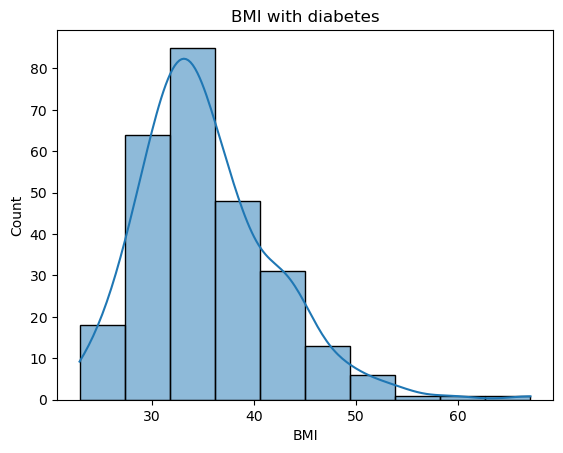

In [16]:
#Visualizing average BMI with diabetes.
sns.histplot(data=has_Diabetes, x='BMI', bins=10, kde=True)
plt.title('BMI with diabetes')
plt.show()

Average BMI without Diabetes: 30.88843434610304


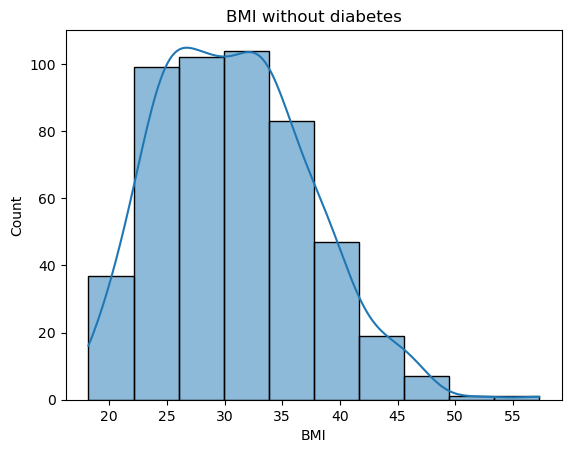

In [17]:
#Visualizing average BMI without diabetes
avg_bmi_not_diabetes = not_Diabetes['BMI'].mean()
print("Average BMI without Diabetes: " + str(avg_bmi_not_diabetes))

sns.histplot(data=not_Diabetes, x='BMI', bins=10, kde=True)
plt.title('BMI without diabetes')
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1) #All columns except the target outcome.
y = df['Outcome'] # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the data.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Reducing the dimensionality of the data with PCA.
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
#Running predictions on our test split.
y_pred = model.predict(X_test)
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.7467532467532467
Precision: 0.6428571428571429
Recall: 0.6545454545454545
F1-Score: 0.6486486486486486
ROC-AUC: 0.7262626262626263


In [21]:
from sklearn.svm import SVC

#SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_pred)

print(f'SVM Accuracy: {svm_accuracy}\nSVM Precision: {svm_precision}\nSVM Recall: {svm_recall}\nSVM F1-Score: {svm_f1}\nSVM ROC-AUC: {svm_roc_auc}')

SVM Accuracy: 0.7662337662337663
SVM Precision: 0.7209302325581395
SVM Recall: 0.5636363636363636
SVM F1-Score: 0.6326530612244898
SVM ROC-AUC: 0.7212121212121211


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

-Considering we are trying to detect diabetes, something that can be harmdul if left undetected, we will go with the random forest model which has a higher recall score which should help reduce false negatives.

-Both models preformed very similarly when comparing the evaluation metrics.

-BMI and Glucose levels had very strong corelations when it came to detecting diabetes.

-The average age in this data set is 33 so it is unclear how will this would preform with other age groups.
